In [1]:
!pip install pandas-profiling --user --upgrade --quiet

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.0.1 which is incompatible.


In [2]:
from urllib.request import urlretrieve

In [3]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x1e9f87547c0>)

In [4]:
import pandas as pd

In [5]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

In [6]:
type(covid_df)

pandas.core.frame.DataFrame

In [7]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [8]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [9]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [10]:
covid_df.shape

(248, 4)

In [11]:
# pandas format is similar to dictionary 
# like date is one key storing many values in it as a list

In [12]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [13]:
covid_df['new_cases'][244]

1365.0

In [14]:
covid_df.at[244,'new_cases']

1365.0

In [15]:
covid_df.new_deaths

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
243    1.0
244    4.0
245    6.0
246    8.0
247    6.0
Name: new_deaths, Length: 248, dtype: float64

In [16]:
cases_deaths=covid_df[['date','new_cases','new_deaths']]

In [17]:
cases_deaths

,date,new_cases,new_deaths
0,2019-12-31,0.0,0.0
1,2020-01-01,0.0,0.0
2,2020-01-02,0.0,0.0
3,2020-01-03,0.0,0.0
4,2020-01-04,0.0,0.0
...,...,...,...
243,2020-08-30,1444.0,1.0
244,2020-08-31,1365.0,4.0
245,2020-09-01,996.0,6.0
246,2020-09-02,975.0,8.0


In [18]:
cases_deaths_copy=cases_deaths.copy()    # creates copy of cases_deaths

In [19]:
cases_deaths_copy

,date,new_cases,new_deaths
0,2019-12-31,0.0,0.0
1,2020-01-01,0.0,0.0
2,2020-01-02,0.0,0.0
3,2020-01-03,0.0,0.0
4,2020-01-04,0.0,0.0
...,...,...,...
243,2020-08-30,1444.0,1.0
244,2020-08-31,1365.0,4.0
245,2020-09-01,996.0,6.0
246,2020-09-02,975.0,8.0


In [20]:
covid_df.loc[244]      # data of a specific row only

date          2020-08-31
new_cases         1365.0
new_deaths           4.0
new_tests        42583.0
Name: 244, dtype: object

In [21]:
covid_df.head(10)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN
7,2020-01-07,0.0,0.0,NaN
8,2020-01-08,0.0,0.0,NaN
9,2020-01-09,0.0,0.0,NaN


In [22]:
covid_df.tail(3)

,date,new_cases,new_deaths,new_tests
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [23]:
covid_df.new_tests.first_valid_index()    # gives the place where NA stops starting from beginning

111

In [24]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


In [25]:
covid_df.sample(10)     # gives random sample of 10 changes every time that it runs

,date,new_cases,new_deaths,new_tests
209,2020-07-27,254.0,5.0,19374.0
122,2020-05-01,1872.0,285.0,43732.0
12,2020-01-12,0.0,0.0,NaN
216,2020-08-03,238.0,8.0,13467.0
167,2020-06-15,338.0,44.0,17463.0
166,2020-06-14,346.0,78.0,29545.0
75,2020-03-15,3497.0,173.0,NaN
85,2020-03-25,5249.0,743.0,NaN
76,2020-03-16,2823.0,370.0,NaN
143,2020-05-22,642.0,156.0,42987.0


In [26]:
total_cases=covid_df.new_cases.sum()
total_deaths=covid_df.new_deaths.sum()

print("total cases are {} while total deaths are as {} :".format(total_cases,total_deaths))

total cases are 271515.0 while total deaths are as 35497.0 :


In [27]:
death_rate=total_deaths/total_cases
print("death rate is as {:.2f} %".format(death_rate*100))

death rate is as 13.07 %


In [28]:
initial_test=935310
total_tests=initial_test+covid_df.new_tests.sum()

print("total of {} tests were performed".format(int(total_tests)))

total of 5214766 tests were performed


In [29]:
positive_rate=total_cases/total_tests

print("Positivity rate for the given data was {:.2f}%".format(positive_rate*100))

Positivity rate for the given data was 5.21%


In [30]:
high_new_cases=covid_df.new_cases>1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [31]:
covid_df[high_new_cases]       # shows all the true value rows only

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [32]:
high_cases=covid_df[covid_df.new_cases>1000]
high_cases               # above code in one line

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [33]:
from IPython.display import display       # for viewing all elements in the list
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [34]:
positive_rate

0.05206657403227681

In [35]:
high_rate=covid_df[covid_df.new_cases/covid_df.new_tests>positive_rate]
high_rate     # days when +-rate was high than the average +-rate

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [36]:
covid_df.new_cases/covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

In [37]:
covid_df['positive_rate']=covid_df.new_cases/covid_df.new_tests
covid_df      # adding a column in the table

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [38]:
covid_df.drop(columns=['positive_rate'],inplace=True)
covid_df      # deleting a column

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [39]:
covid_df.sort_values('new_deaths',ascending=False).head(10)
# sorting on default is ascending

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


In [40]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [41]:
covid_df.at[172,'new_cases']=(covid_df.at[171,'new_cases']+covid_df.at[173,'new_cases'])/2

In [42]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


In [43]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [44]:
covid_df['date'] = pd.to_datetime(covid_df.date)   # coverting data type of date from object to date format

In [45]:
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [46]:
covid_df['year']=pd.DatetimeIndex(covid_df.date).year
covid_df['month']=pd.DatetimeIndex(covid_df.date).month
covid_df['day']=pd.DatetimeIndex(covid_df.date).day
covid_df['weekday']=pd.DatetimeIndex(covid_df.date).weekday

covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [47]:
# total of covid data for may

covid_df_may=covid_df[covid_df.month==5]
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [48]:
covid_df_may_matrix=covid_df_may[['new_cases','new_deaths','new_tests']]
covid_df_may_matrix

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [49]:
covid_df_may_total=covid_df_may_matrix.sum()
covid_df_may_total

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [50]:
# above 3 steps in one step

covid_df[covid_df.month==5][['new_cases','new_deaths','new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [51]:
# mean of the deaths
covid_df.new_deaths.mean()

143.13306451612902

In [52]:
# mean of deaths on sunday

covid_df[covid_df.weekday==6].new_cases.mean()

1247.2571428571428

In [53]:
# grouping

covid_month_df=covid_df.groupby('month')[['new_cases','new_deaths','new_tests']].sum()

In [54]:
covid_month_df    # month wise data

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [55]:
# grouping and mean 

covid_month_mean=covid_df.groupby('month')[['new_cases','new_deaths','new_tests']].mean()
covid_month_mean

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,273.916667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


In [56]:
# grouping by day

covid_weekday_total=covid_df.groupby('weekday')[['new_cases','new_deaths','new_tests']].sum()
covid_weekday_total

,new_cases,new_deaths,new_tests
weekday,,,
0,38820.0,4368.0,396534.0
1,33071.0,4678.0,623338.0
2,33383.0,5211.0,658639.0
3,39444.0,5093.0,655283.0
4,41640.0,5071.0,745288.0
5,41948.5,5495.0,657200.0
6,43654.0,5581.0,543174.0


In [57]:
# cumulative sum

covid_df['total_cases']=covid_df.new_cases.cumsum()
covid_df[['new_cases','total_cases']]

,new_cases,total_cases
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
243,1444.0,267298.5
244,1365.0,268663.5
245,996.0,269659.5
246,975.0,270634.5


In [58]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')     # another data

('locations.csv', <http.client.HTTPMessage at 0x1e9fab79370>)

In [59]:
locations_df = pd.read_csv('locations.csv')
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [60]:
locations_df.hospital_beds_per_thousand.max()

13.8

In [61]:
locations_df[locations_df.location=='Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [62]:
covid_df['location']='Italy'
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,Italy
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,Italy


In [63]:
merged_df=covid_df.merge(locations_df,on='location')
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [64]:
merged_df['deaths_per_million'] = merged_df.new_deaths * 1e6 / merged_df.population
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,deaths_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.016539
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.066157
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.099236
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.132315


In [65]:
# converting back to csv file

result_df=merged_df[['date',
                    'new_cases',
                    'new_deaths',
                    'total_cases',
                    'deaths_per_million']]
result_df

,date,new_cases,new_deaths,total_cases,deaths_per_million
0,2019-12-31,0.0,0.0,0.0,0.000000
1,2020-01-01,0.0,0.0,0.0,0.000000
2,2020-01-02,0.0,0.0,0.0,0.000000
3,2020-01-03,0.0,0.0,0.0,0.000000
4,2020-01-04,0.0,0.0,0.0,0.000000
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,267298.5,0.016539
244,2020-08-31,1365.0,4.0,268663.5,0.066157
245,2020-09-01,996.0,6.0,269659.5,0.099236
246,2020-09-02,975.0,8.0,270634.5,0.132315


In [66]:
result_df.to_csv('results.csv',index=None)

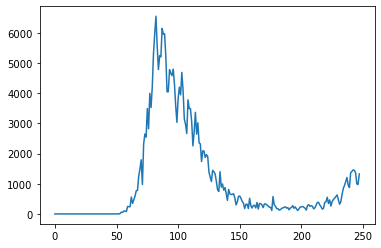

In [67]:
result_df.new_cases.plot();

In [68]:
result_df.set_index('date', inplace=True)

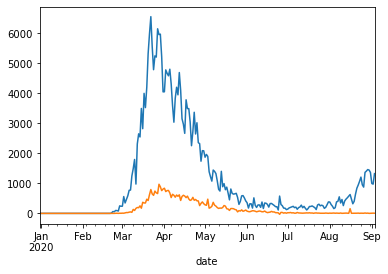

In [69]:
result_df.new_cases.plot()
result_df.new_deaths.plot();

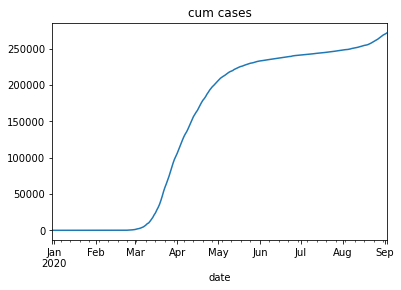

In [70]:
result_df.total_cases.plot(title='cum cases');

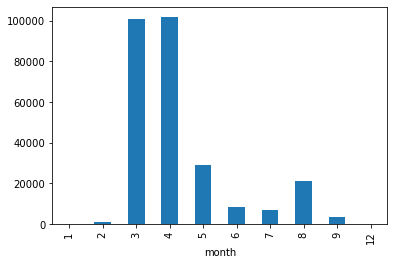

In [71]:
covid_month_df.new_cases.plot(kind='bar');